In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2
import glob
import sys

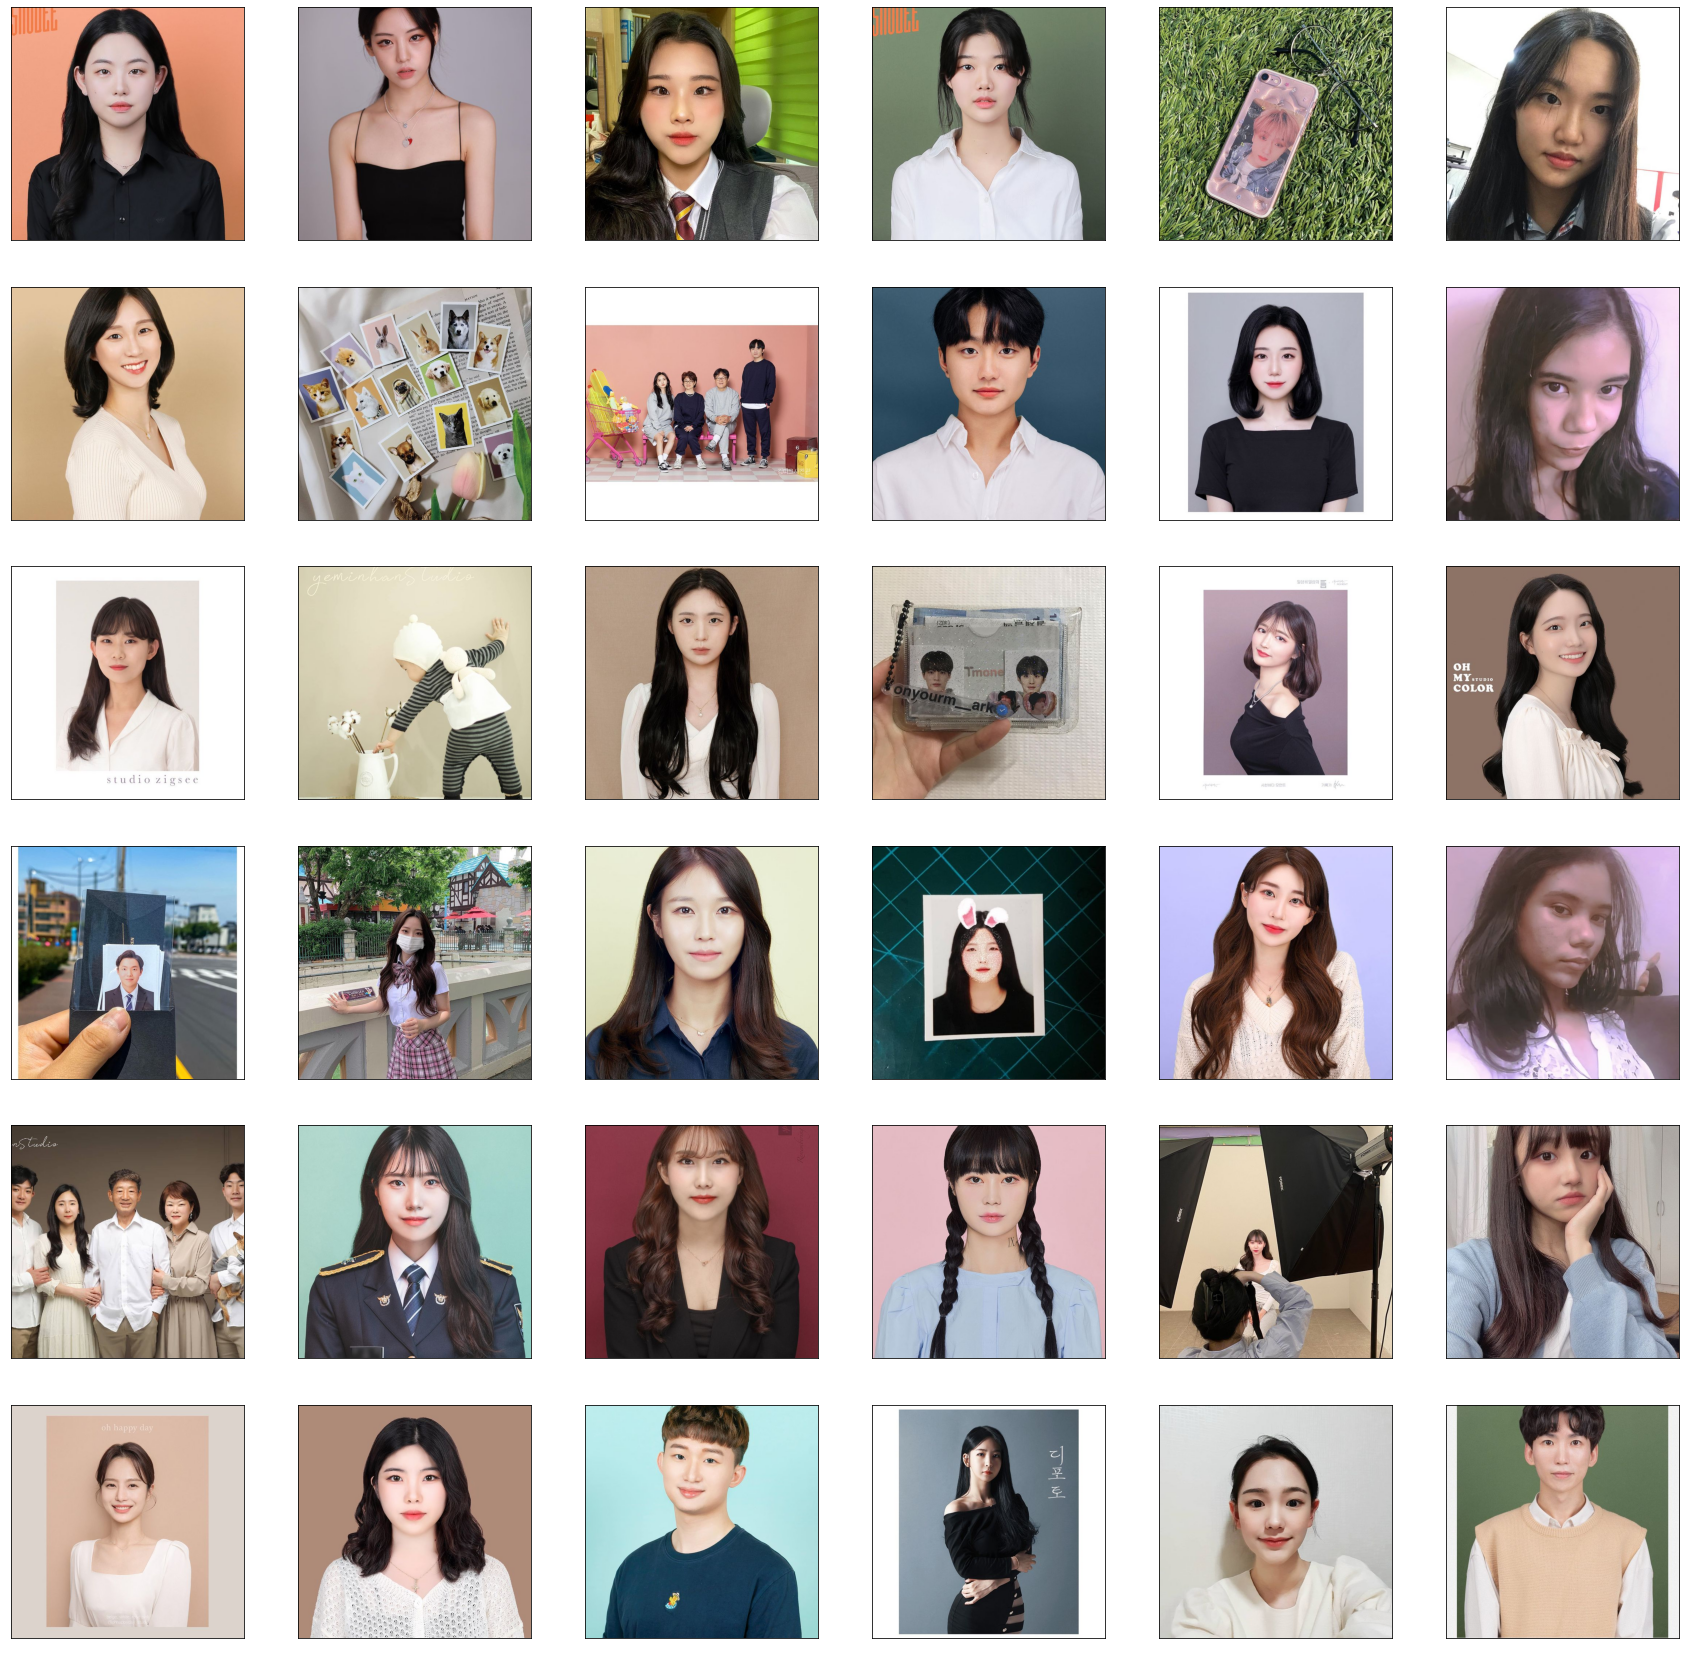

In [2]:
#https://blog.daum.net/geoscience/1263
fig = plt.figure(figsize=(30,30)) # rows*cols 행렬의 i번째 subplot 생성
rows = 6
cols = 6
i = 1

for filename in glob.glob("./img/*.jpg"):
    if (i > rows*cols):
        break
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(filename.split('/')[-1])
    ax.xaxis.label.set_color('white') #label 이름이 안 보이면  dark mode에서 작업하세요. 
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
plt.show()

### 사람 얼굴이 맞는지 검증

사람 얼굴이 없거나 너무 많은 사진의 경우에는 데이터에서 제외하기 위함이다. opencv를 이용하여 간단하게 구현할 수 있다. (별도의 훈련 필요 없음)

[opencv pre-trained face recognition](https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81)

In [6]:
cascPath = './face_recognition.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

In [87]:
image = cv2.imread('./img/id_photo44.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [88]:
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5,
    minSize=(30, 30),
)

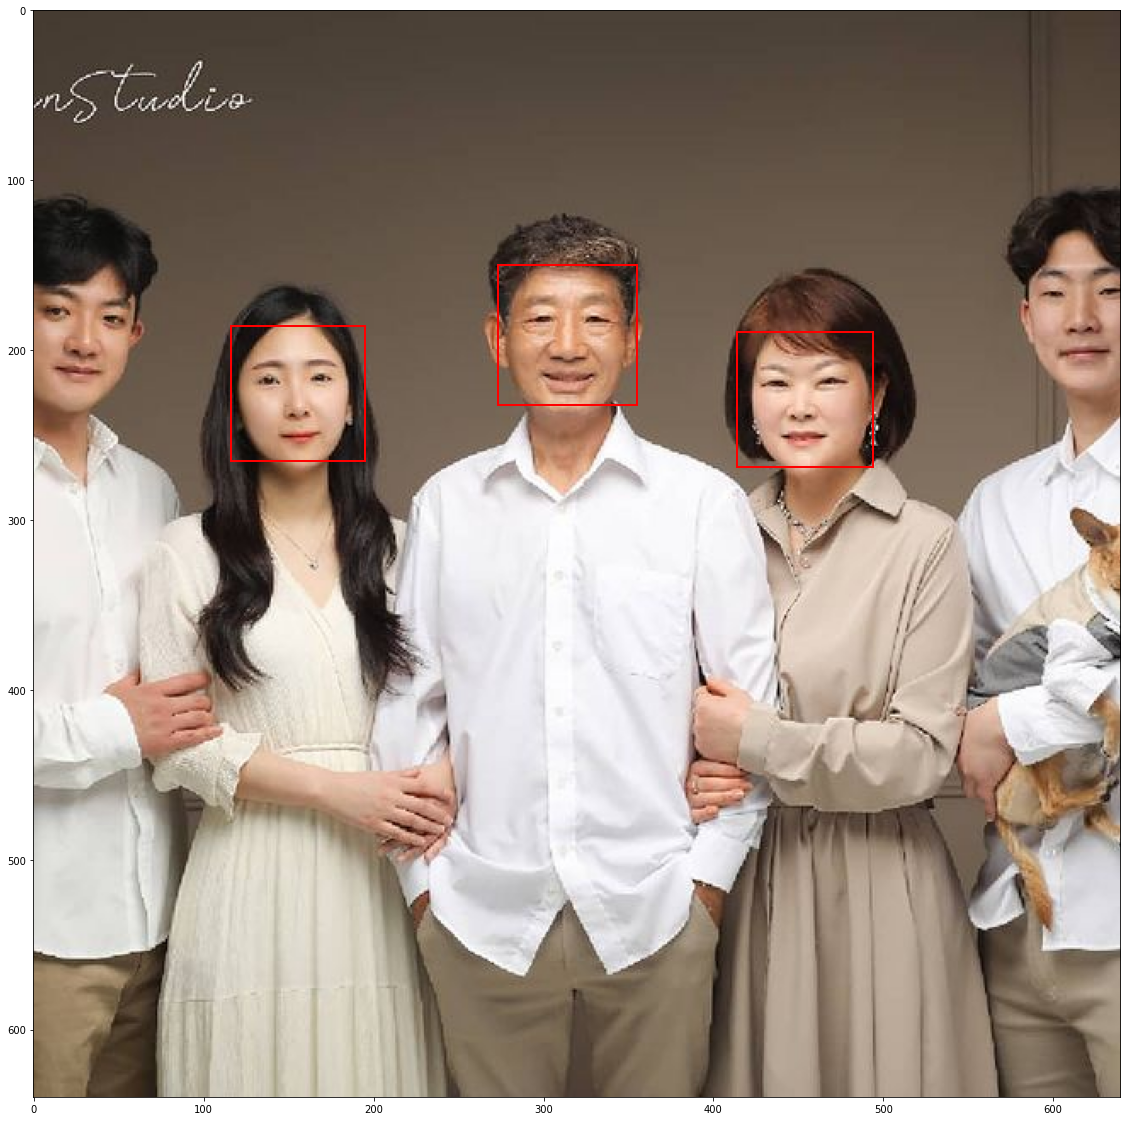

In [89]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax = plt.gca()
for x, y, w, h in faces:
    rect = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor='red', fill=False)
    ax.add_patch(rect)
plt.show()